In [1]:
import os
import re
from collections import Counter

import anndata
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import enrichrpy.enrichr as een
import enrichrpy.plotting as epl

In [2]:
a = sc.read_h5ad('../data/single_cell/annotated/all_annotated.h5ad')
a

AnnData object with n_obs × n_vars = 198720 × 3000
    obs: 'sample_id', 'dataset', 'tissue_type', 'doublet_score', 'is_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Bailey | ADEX score', 'Collison | Exocrine-like score', 'Moffit | Basal score', 'Bailey | Squamous-like score', 'Bailey | Pancreatic-Progenitor score', 'Bailey | Immunogenic score', 'Collison | Quasi-Mesenchymal score', 'Collison | Classical score', 'Moffit | Classical score', 'subTME | deserted score', 'subTME | reactive score', 'raghaven | scBasal score', 'raghaven | scClassical score', 'raghaven | IC score', 'raghaven | Pericyte-like score', 'raghaven | Fibroblast-like score', 'raghaven | Inflammatory score', 'raghaven | TAM-FCN1 score', 'raghaven | TAM-C1QC score', 'raghaven | TAM-SPP1 score', 'elyada | myCAF score', 'elyada | iCAF score', 'elyada | apCAF score', 'ben-porath | ES exp1 score', 'ben-porath | ES exp2 score', 'ben-porath | Nanog targets score', 'be

In [3]:
integrated = sc.read_h5ad('../data/single_cell/original/count_matrix/integrated.h5ad')
integrated

AnnData object with n_obs × n_vars = 271827 × 3000
    obs: 'sample_id', 'dataset', 'tissue_type', 'doublet_score', 'is_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Bailey | ADEX score', 'Bailey | Squamous-like score', 'Bailey | Pancreatic-Progenitor score', 'Bailey | Immunogenic score', 'Collison | Exocrine-like score', 'Collison | Quasi-Mesenchymal score', 'Collison | Classical score', 'Moffit | Basal score', 'Moffit | Classical score', 'subTME | deserted score', 'subTME | reactive score', 'raghaven | scBasal score', 'raghaven | scClassical score', 'raghaven | IC score', 'raghaven | Pericyte-like score', 'raghaven | Fibroblast-like score', 'raghaven | Inflammatory score', 'raghaven | TAM-FCN1 score', 'raghaven | TAM-C1QC score', 'raghaven | TAM-SPP1 score', 'elyada | myCAF score', 'elyada | iCAF score', 'elyada | apCAF score', 'ben-porath | ES exp1 score', 'ben-porath | ES exp2 score', 'ben-porath | Nanog targets score', 'be

In [4]:
f = integrated[a.obs.index]

In [5]:
a.obs['copykat_prediction'] = f.obs['copykat_prediction']
a.obs['copykat_cna_count'] = f.obs['copykat_cna_count']

In [6]:
epi = a[[True if ct in ['Malignant - Basal', 'Malignant - Classical', 'Normal Epithelial'] else False
         for ct in a.obs['cell_type_specific']]]

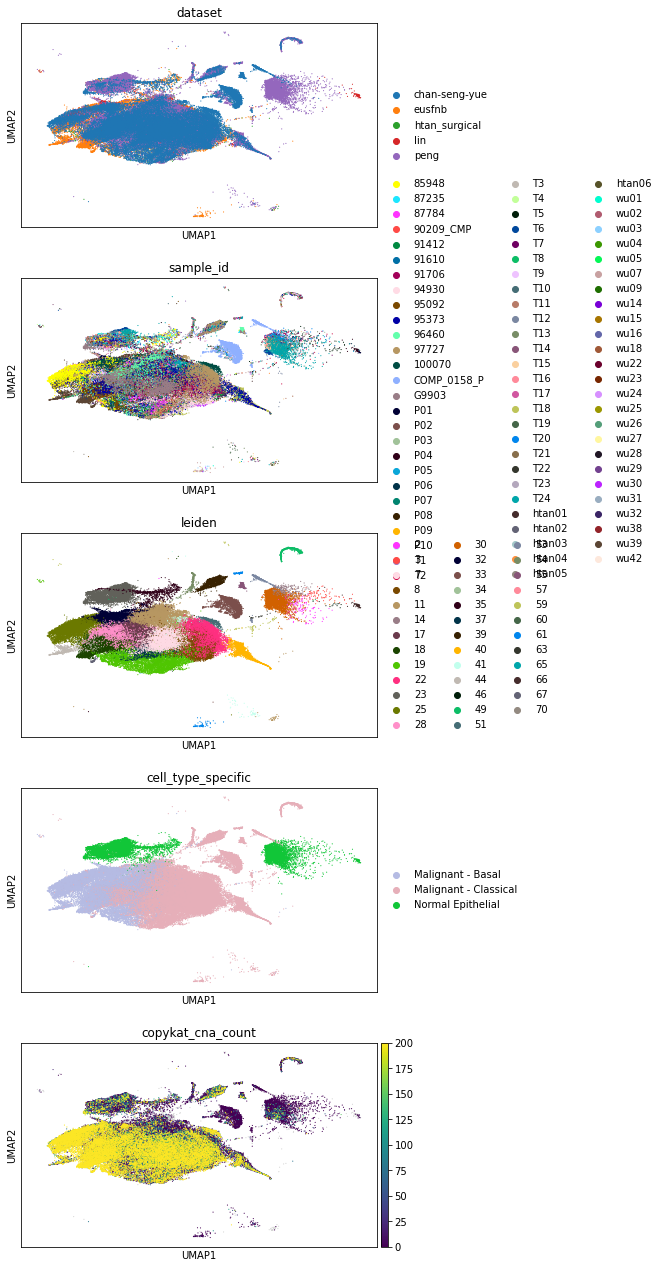

In [17]:
sc.pl.umap(epi, color=['dataset', 'sample_id', 'leiden', 'cell_type_specific', 'copykat_cna_count'],
           ncols=1, vmax=200, size=5)

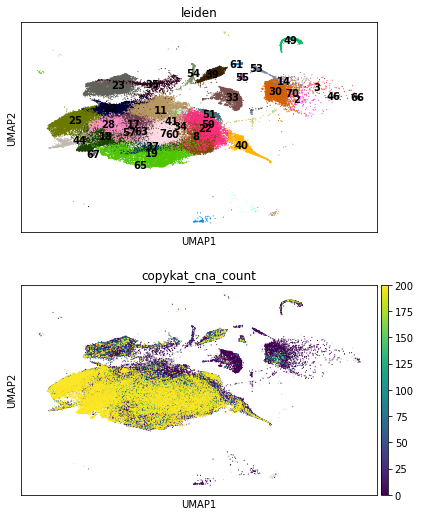

In [18]:
sc.pl.umap(epi, color=['leiden', 'copykat_cna_count'],
           ncols=1, vmax=200, size=5, legend_loc='on data')

In [ ]:
# recall the normal epithelial
normal = ['53', '30', '14', '70', '2', '3', '46', '66', '33', '54']